<a href="https://colab.research.google.com/github/enVives/TFG/blob/main/RecercaExtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import cv2
import csv
import random
import numpy as np
import ast
import os
import time
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import wandb
import pylab as pl
import json

from glob import glob
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from torchvision import transforms,models
from torch import nn
from torch.utils.data import Dataset
from google.colab import files
from IPython.display import clear_output,display
from google.colab.patches import cv2_imshow
from PIL import Image
from skimage import io
from google.colab import drive

# ORIGEN = '/content/drive/MyDrive/HAM10000/skin-cancer-mnist-ham10000/'
DOWNLOAD = False
drive.mount('/content/drive')

if DOWNLOAD:
  !rm -rf /content/sample_data/*

  !kaggle datasets download -d "kmader/skin-cancer-mnist-ham10000"

  !unzip -o skin-cancer-mnist-ham10000.zip -d /content/sample_data/


# IMAGE_PATHS1 = glob('/content/sample_data/HAM10000_images_part_1/*.jpg')
# IMAGE_PATHS2 = glob('/content/sample_data/HAM10000_images_part_2/*.jpg')
# IMAGE_PATHS3 = glob('/content/sample_data/ham10000_images_part_1/*.jpg')
# IMAGE_PATHS4 = glob('/content/sample_data/ham10000_images_part_2/*.jpg')
# IMAGE_PATHS = IMAGE_PATHS1 + IMAGE_PATHS2 + IMAGE_PATHS3 + IMAGE_PATHS4
# PATH_TRAINING_DISTANCES = "/content/drive/MyDrive/Features/Embeddings/embeddings_pesos_resnet152multiclass_3.pt.txt" #embeddings training
# DISTANCES_IMAGES = "/content/drive/MyDrive/Features/Dist/1/distances.txt" #distàncies de totes les imatges de test
IMATGES_INTERES = ["ISIC_0027790.jpg","ISIC_0027010.jpg","ISIC_0025415.jpg","ISIC_0026286.jpg","ISIC_0025606.jpg","ISIC_0028732.jpg"
,"ISIC_0026879.jpg","ISIC_0025466.jpg","ISIC_0025746.jpg","ISIC_0026143.jpg","ISIC_0026947.jpg","ISIC_0028777.jpg","ISIC_0024803.jpg","ISIC_0020292.jpg"
,"ISIC_0027970.jpg","ISIC_0028921.jpg","ISIC_0024891.jpg","ISIC_0026315.jpg","ISIC_0026392.jpg","ISIC_0027199.jpg","ISIC_0026127.jpg"
,"ISIC_0026303.jpg","ISIC_0029097.jpg","ISIC_0025282.jpg","ISIC_0028642.jpg","ISIC_0027925.jpg","ISIC_0025216.jpg","ISIC_0028424.jpg","ISIC_0025526.jpg"
,"ISIC_0026184.jpg","ISIC_0024779.jpg","ISIC_0026998.jpg","ISIC_0024342.jpg","ISIC_0024411.jpg","ISIC_0026015.jpg","ISIC_0026651.jpg"] #imatges amb els patrons que cercam

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


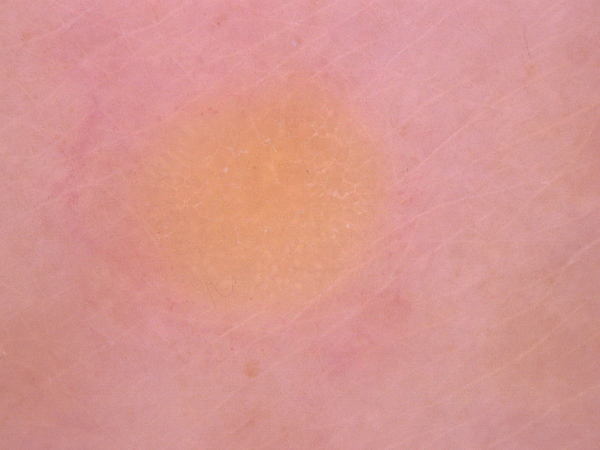

/content/sample_data/HAM10000_images_part_1/ISIC_0024337.jpg


KeyboardInterrupt: 

In [13]:
# Supón que IMAGE_PATHS ya contiene todas tus rutas
# for path in IMAGE_PATHS:  # Puedes cambiar el número de imágenes que deseas ver
#     img = Image.open(path)
#     clear_output(wait=True)  # Limpia la celda para mostrar la siguiente imagen
#     display(img)
#     print(path)
#     time.sleep(5)  # Espera 2 segundos


In [ ]:
# !mkdir -p ~/.kaggle
# !mv /content/kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataframe = pd.read_csv(DISTANCES_IMAGES, sep=';')
# embeddings_training = pd.read_csv(PATH_TRAINING_DISTANCES, sep=',')
# files_interes = []

# for i in IMATGES_INTERES:
#     fila = dataframe[dataframe['test_img'] == i]
#     files_interes.append(fila)

# for i in files_interes:
#   vector_features = [[],[]]

#   imatge_test = i['test_img'].iloc[0]
#   imatges_training = ast.literal_eval(i['top_images_names'].iloc[0])
#   imatges_training_jpg = [img + ".jpg" for img in imatges_training]

#   training = embeddings_training[embeddings_training['Image Name'].isin(imatges_training_jpg)][['FC Input','Image Name']]
#   distances_training = training['FC Input'].to_list()
#   vector_features[0].append(training['Image Name'].to_list())

#   for j in distances_training:
#     vector_features[1].append(ast.literal_eval(j)) #distàncies de les imatges d'entrenament guardades, ens interessaria els noms també

#   #falta cercar el vector de distàncies de la imatge de test i fer les comparacions adients.



In [ ]:
# print(vector_features)